# Laboratorio 4 - Regresión y Clustering

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 2 - Características de los Inmuebles

In [300]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [301]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [303]:
#Importamos el CSV
dataset = pd.read_csv('casas.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [304]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### La columna Id no aporta absolutamente nada extra, es más no es determinante ni descriptiva del valor de una casa por lo que procedemos a eliminarla. Del mismo modo, la variable objetivo es el precio por lo que vamos a sacarlo del dataset. Así obtendremos las 80 variables que describen las casas.

In [305]:
# Creamos el array con la clase de cada registro.
precioDeVenta = dataset["SalePrice"].values
dataset = dataset.drop(columns=['Id'])
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [306]:
#Miramos cuantos datos duplicados hay
numDuplicados = dataset.duplicated().sum()
print('Hay',numDuplicados,'valores duplicados')

Hay 0 valores duplicados


In [307]:
#Miramos cuantos datos nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [308]:
#Pasamos las columnas no numericas, los nulos a un valor numerico propio, 'Desconocido'
columnasNoNumericas = dataset.dtypes[dataset.dtypes == 'object']
columnasNoNumericas.index

#Hemos detectado que hay ciertas columnas que el NA implica NO por lo que pondremos ese valor realmente, 
#no es que sea desconocido, es que no tienen esa propiedad las casas
columnasNAesNo = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
                  'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature',]

for col in columnasNAesNo:
    dataset[col] = dataset[col].fillna('No')

In [309]:
#Actualizamos las columnas nulas
#Miramos cuantos datos nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
GarageYrBlt,81,5.547945


In [310]:
#Pasamos las columnas no numericas, los nulos a un valor numerico propio, 'Desconocido'
columnasNoNumericas = dataset.dtypes[dataset.dtypes == 'object']

for col in columnasNoNumericas.index:
    if(col in dataFrameNulos.index):
        dataset[col] = dataset[col].fillna('Desconocido')

In [311]:
#Actualizamos las columnas nulas
#Miramos cuantos datos nulos hay
columnasNulas = dataset.isnull().sum()
porcentajes = []
valores = []

for col in columnasNulas:
    porcent = (col/dataset.shape[0])*100
    porcentajes.append(porcent)
    
dataFrameNulos = {'Nulos': columnasNulas, 'Porcentaje': porcentajes}
dataFrameNulos = pd.DataFrame(dataFrameNulos)
dataFrameNulos = dataFrameNulos.loc[dataFrameNulos['Nulos'] > 0]
dataFrameNulos

,Nulos,Porcentaje
LotFrontage,259,17.739726
MasVnrArea,8,0.547945
GarageYrBlt,81,5.547945


In [312]:
#Como tenemos pocos datos nulos, vamos a poner el valor medio en cada uno de los valores nulos que tenemos.
#Asi no eliminamos datos y podemos completar el dataset con los valores medios.
for col in dataFrameNulos.index:
    dataset[col] = dataset[col].fillna(round(dataset[col].mean(),2))

#### Estas son las columnas de tipo numérico que contienen campos nulos. En estos valores nulos pondremos el valor medio de la columna. Eliminar por ejemplo más de 200 casas por no tener 'LotFrontage' o más de 80 por carecer del año de fabricación del garaje nos parece que es eliminar datos significativos

In [313]:
#Visualizamos el dataset
dataset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,250000
5,50,RL,85.00,14115,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.00,10084,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,8,2007,WD,Normal,307000
7,60,RL,70.05,10382,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.00,6120,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,4,2008,WD,Abnorml,129900
9,190,RL,50.00,7420,Pave,No,Reg,Lvl,AllPub,Corner,...,0,No,No,No,0,1,2008,WD,Normal,118000


In [314]:
#Comprobamos nulos
print('El dataset tiene un tamaño de:',dataset.shape)
print('Existen',dataset.isnull().sum().sum(),'campos nulos')

El dataset tiene un tamaño de: (1460, 80)
Existen 0 campos nulos


### 1) Realiza todo el preprocesamiento que sea necesario para adaptar las variables que no sean unívocas del dataset y poder usar el algoritmo adecuado. (1 punto)

#### Hay muchas columnas en el dataset que no nos aportan valores unívocos de las casas, por lo que nos vamos a quedar con las columnas unívocas de las casas. ¿Cómo definimos estas columnas? Tenemos que tener en cuenta qué es lo que define a una casa pase lo que pase, y que además estos valores no cambien a lo largo del tiempo, por tanto, nos quedaremos con una serie de columnas que definen de manera unívoca a las casas.

#### Hemos decidido que estas variables que definen a las casas de manera unívoca y no cambian en el tiempo son:
#### <ul><li>LotArea</li> <li>Neighborhood</li> <li>Foundation</li> <li>GarageArea</li> <li>YearBuilt</li></ul>

In [315]:
#Obtenemos los nuevos datos para operar sobre ellos
datasetTratamiento = dataset[['LotArea', 'Neighborhood', 'Foundation', 'GarageArea', 'YearBuilt']].copy()
datasetTratamiento

,LotArea,Neighborhood,Foundation,GarageArea,YearBuilt
0,8450,CollgCr,PConc,548,2003
1,9600,Veenker,CBlock,460,1976
2,11250,CollgCr,PConc,608,2001
3,9550,Crawfor,BrkTil,642,1915
4,14260,NoRidge,PConc,836,2000
...,...,...,...,...,...
1455,7917,Gilbert,PConc,460,1999
1456,13175,NWAmes,CBlock,500,1978
1457,9042,Crawfor,Stone,252,1941
1458,9717,NAmes,CBlock,240,1950


In [316]:
#Obtenemos tambien los precios de venta en un Dataframe
precioDeVentaDF = pd.DataFrame({'Precio': precioDeVenta})
precioDeVentaDF

,Precio
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [270]:
#Pasamos a estandarizar y normalizar los datos con la librería StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transformado = scaler.fit_transform(dataset)
transformado = pd.DataFrame(transformado)
transformado

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574411,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093111,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456475,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574411,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365634,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574411,-0.973018,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.872563,0.679038,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,0.309859,-0.183952,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574411,-0.369871,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.872563,-0.093111,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574411,-0.865548,6.092188,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [271]:
#Importamos Librería PCA de Scikit Learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [272]:
principalComponents = pca.fit_transform(transformado)

In [273]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente 1', 'Componente 2'])
principalDf

,Componente 1,Componente 2
0,4.087239,1.769224
1,0.264126,-3.188852
2,4.990243,1.033568
3,-1.523975,0.264122
4,6.672724,0.742069
...,...,...
1455,2.107828,1.619428
1456,0.327867,-5.741172
1457,1.050353,0.501769
1458,-2.951090,-3.495188


In [274]:
principalDf['Precio'] = precioDeVenta
principalDf

,Componente 1,Componente 2,Precio
0,4.087239,1.769224,208500
1,0.264126,-3.188852,181500
2,4.990243,1.033568,223500
3,-1.523975,0.264122,140000
4,6.672724,0.742069,250000
...,...,...,...
1455,2.107828,1.619428,175000
1456,0.327867,-5.741172,210000
1457,1.050353,0.501769,266500
1458,-2.951090,-3.495188,142125


In [281]:
def rangosPrecios(precios):
    rangos = []
    for precio in precios:
        if precio < 100000:
            rango = 0        
        elif precio < 200000:
            rango = 1
        elif precio < 300000:
            rango = 2
        elif precio < 400000:
            rango = 3
        elif precio < 500000:
            rango = 4
        elif precio < 600000:
            rango = 5
        elif precio < 700000:
            rango = 6
        else:
            rango = 7
        rangos.append(rango)
    return rangos

In [282]:
rangos = rangosPrecios(precioDeVenta)
principalDf['RangoPrecio'] = rangos
principalDf

,Componente 1,Componente 2,Precio,RangoPrecio
0,4.087239,1.769224,208500,2
1,0.264126,-3.188852,181500,1
2,4.990243,1.033568,223500,2
3,-1.523975,0.264122,140000,1
4,6.672724,0.742069,250000,2
...,...,...,...,...
1455,2.107828,1.619428,175000,1
1456,0.327867,-5.741172,210000,2
1457,1.050353,0.501769,266500,2
1458,-2.951090,-3.495188,142125,1


In [293]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# run kmeans with many different k
distortions = []
K = range(1,50)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(principalDf)
    distortions.append(k_means.inertia_)
    #distortions.append(sum(np.min(cdist(principalDf, k_means.cluster_centers_, 'euclidean'), axis=1)) / principalComponents.shape[0])

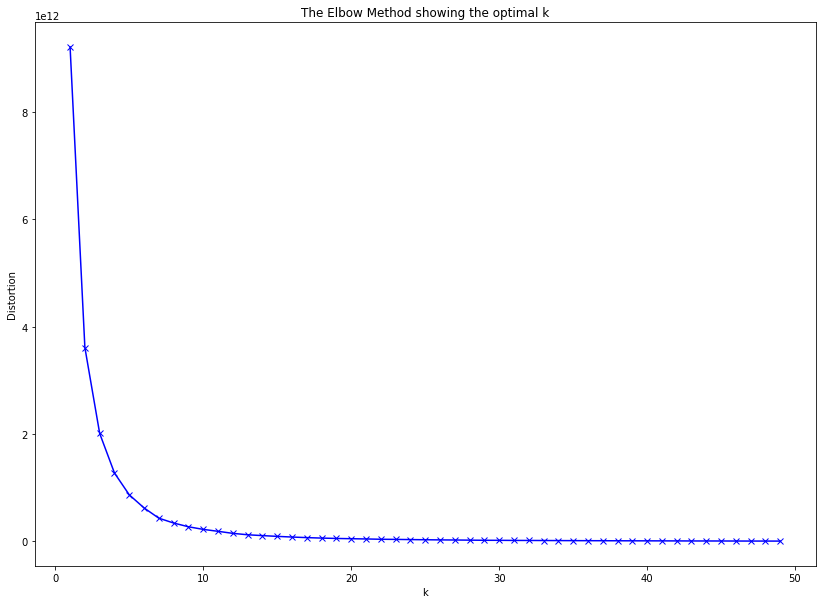

In [294]:
Y_line = [distortions[0], distortions[-1]]
plt.figure(figsize=(14,10))
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

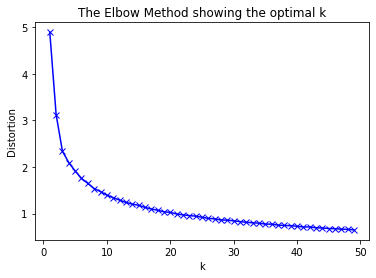

In [296]:
# create new plot and data
plt.plot()

# k means determine k
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(principalComponents)
    kmeanModel.fit(principalComponents)
    distortions.append(sum(np.min(cdist(principalComponents, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) 
                       / principalComponents.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [146]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(principalComponents)
predicciones = pd.DataFrame(y_pred)

In [147]:
predicciones.describe()

,0
count,1460.000000
mean,2.454110
std,1.533703
min,0.000000
25%,0.000000
50%,3.000000
75%,3.000000
max,7.000000


### 2) Utiliza varias configuraciones teniendo en cuenta el número de grupos a crear y cambiando la medida de distancia entre individuos. Crea una tabla donde se incluya toda la información y el número de iteraciones necesarias para llegar a la solución que presentas. Se considera la mejor solución a aquella que necesita menos iteraciones (1 punto)

Probando modelo con K= 1
--------------------------


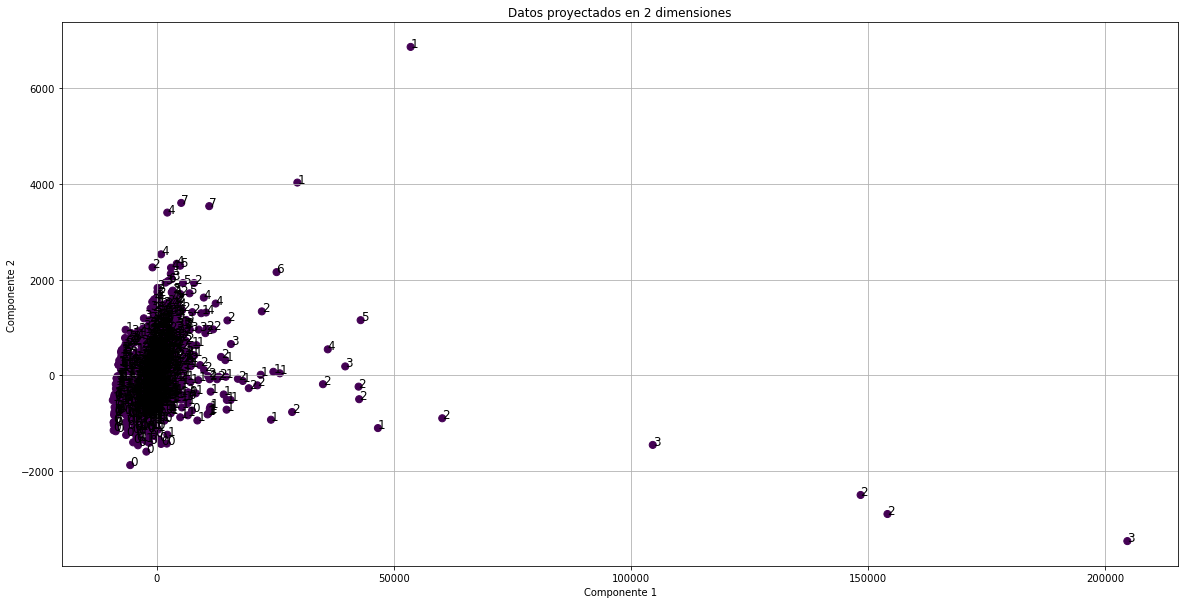

Probando modelo con K= 2
--------------------------


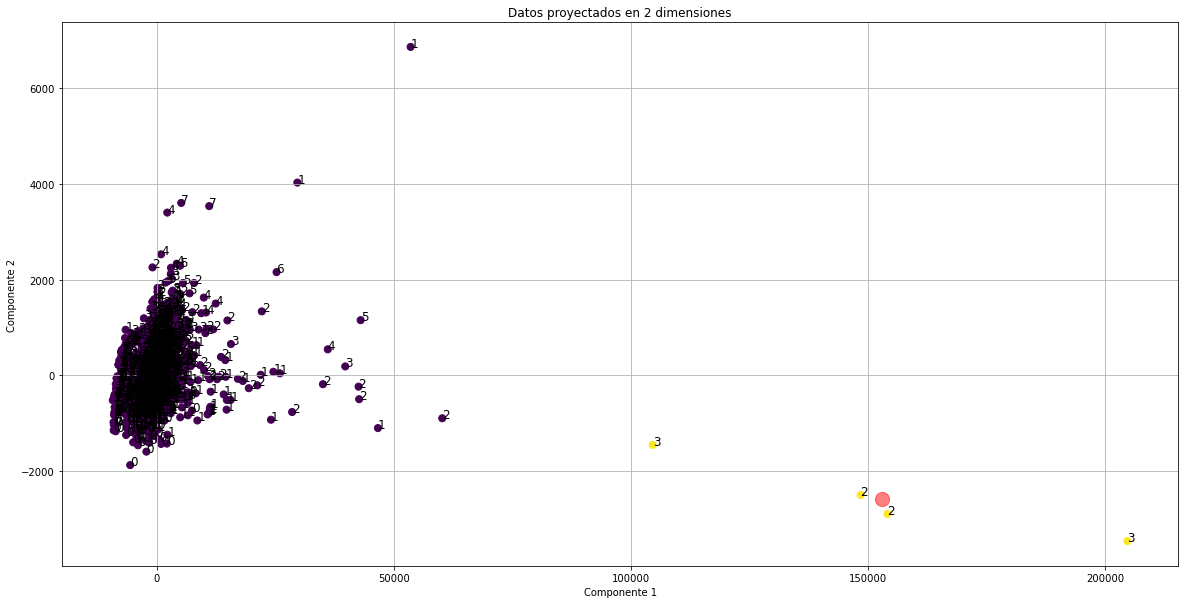

Probando modelo con K= 3
--------------------------


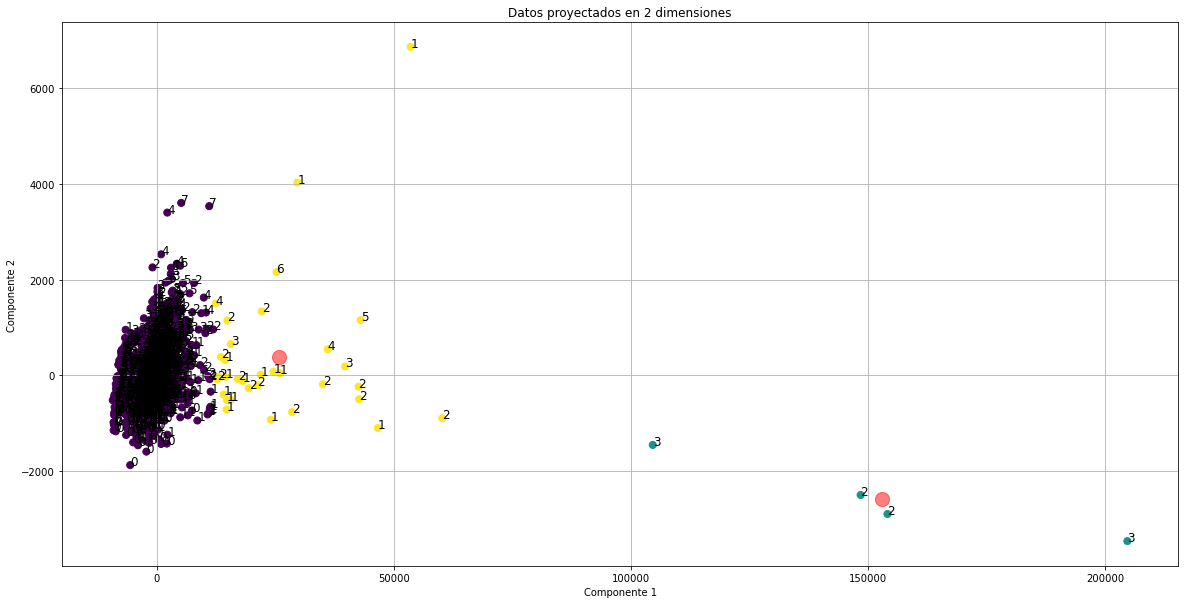

Probando modelo con K= 4
--------------------------


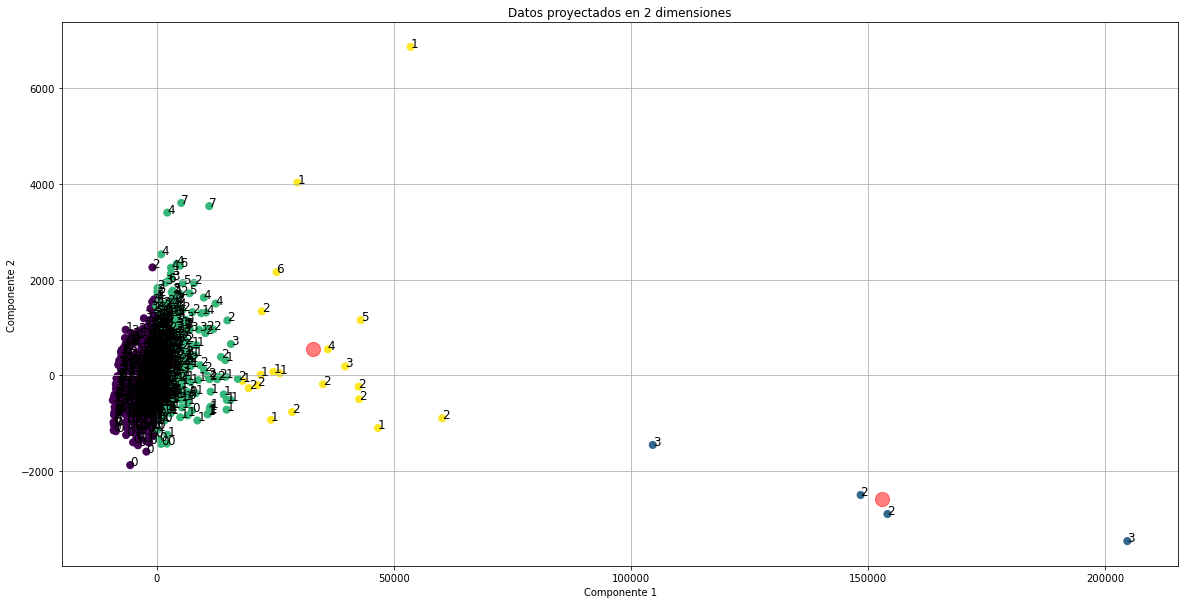

Probando modelo con K= 5
--------------------------


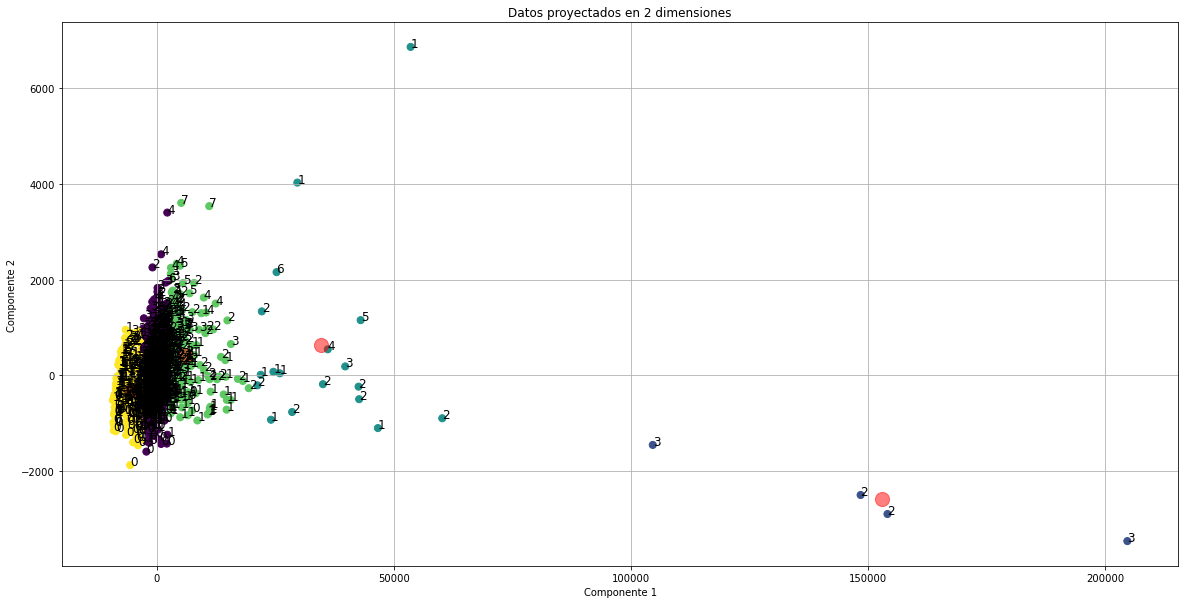

Probando modelo con K= 6
--------------------------


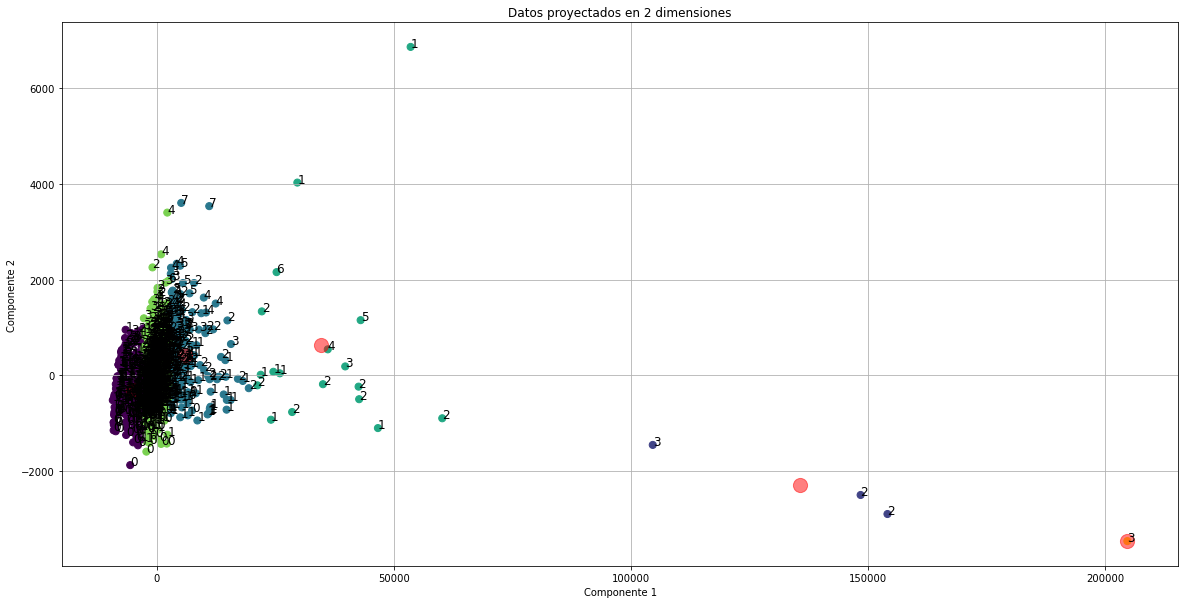

Probando modelo con K= 7
--------------------------


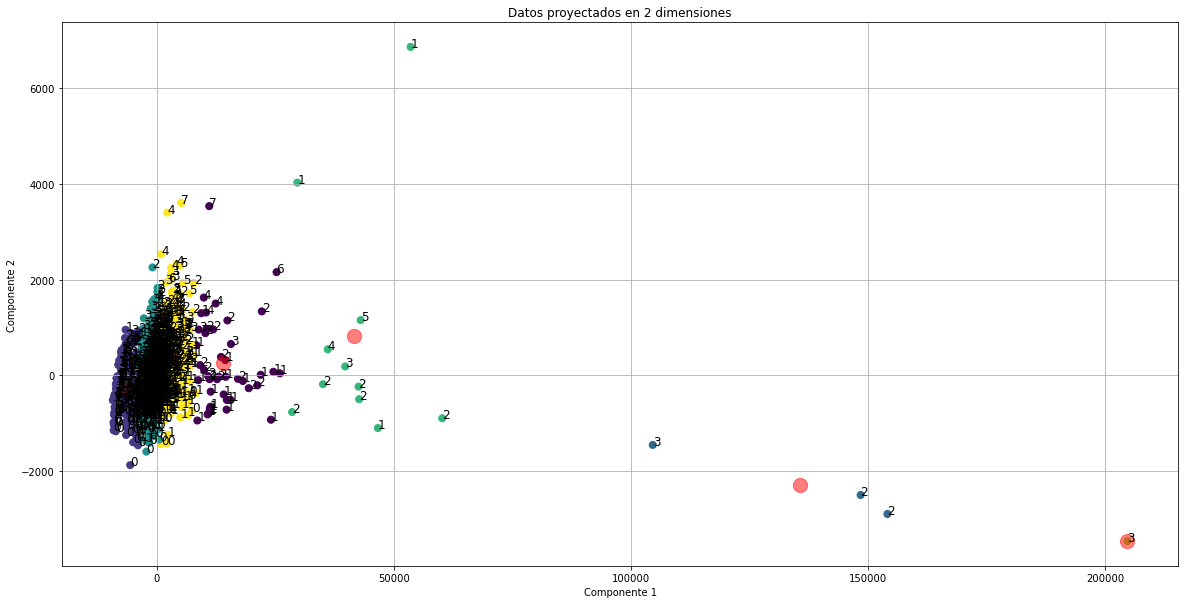

Probando modelo con K= 8
--------------------------


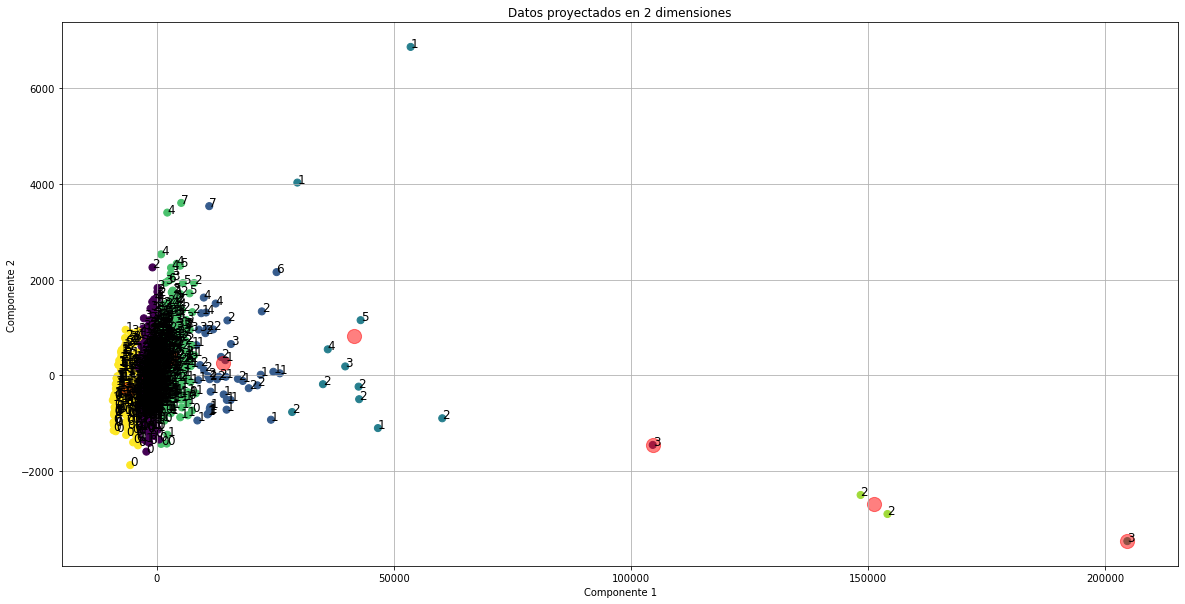

Probando modelo con K= 9
--------------------------


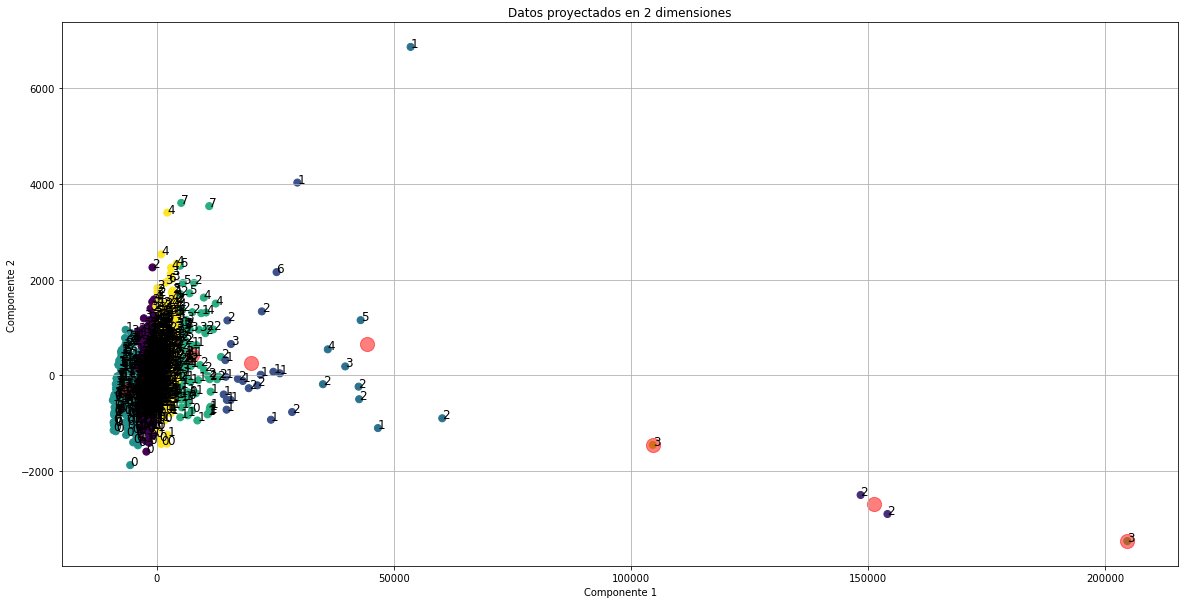

Probando modelo con K= 10
--------------------------


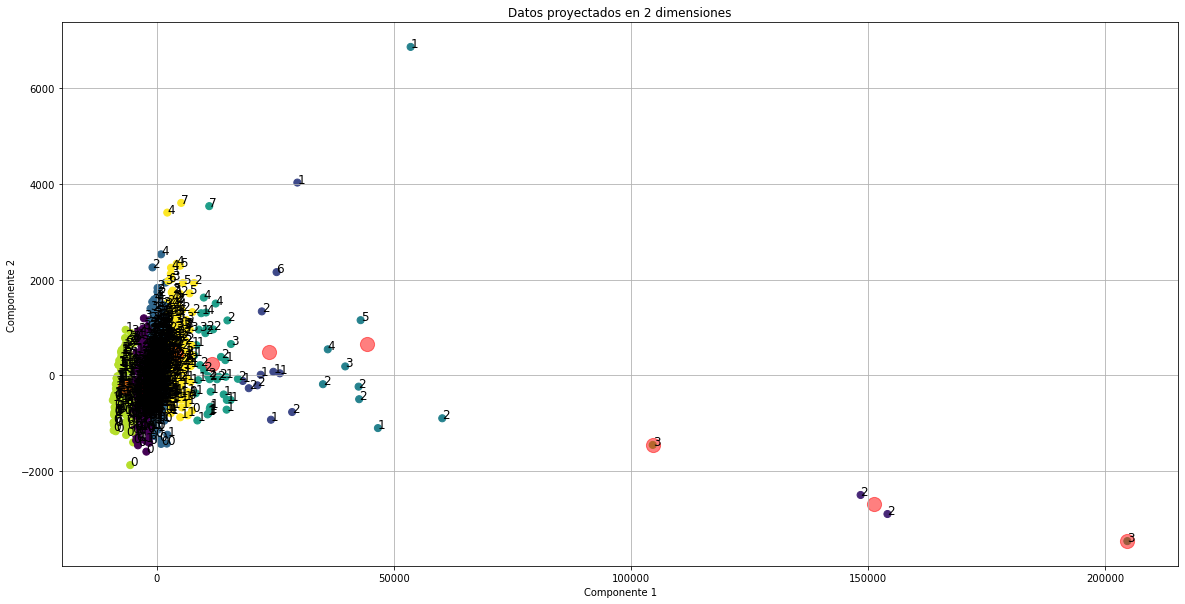

Probando modelo con K= 11
--------------------------


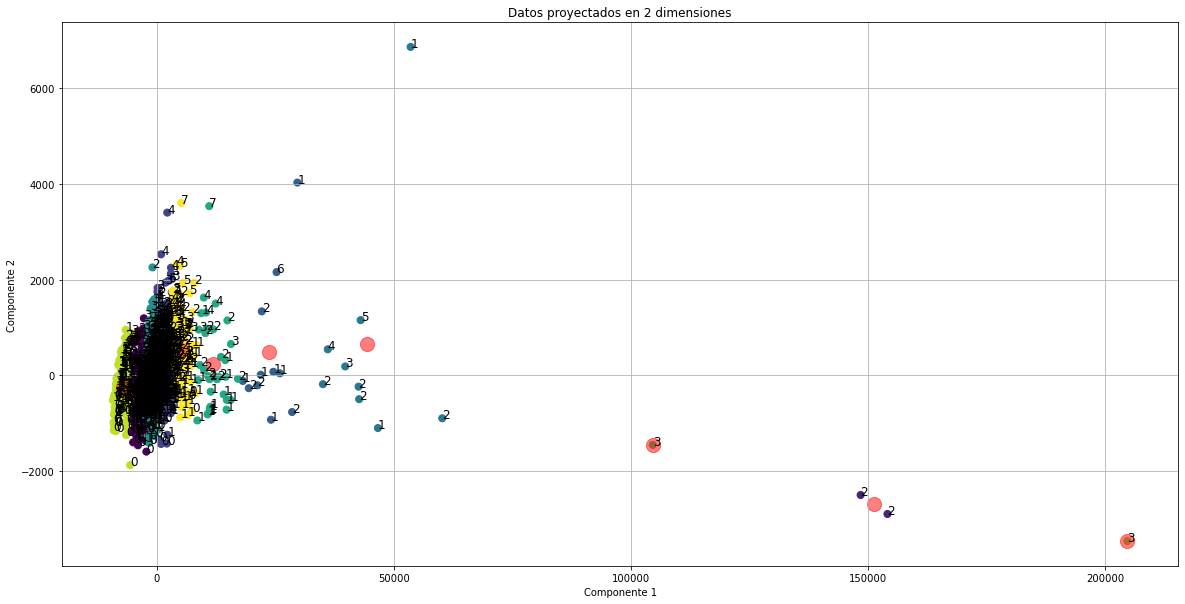

Probando modelo con K= 12
--------------------------


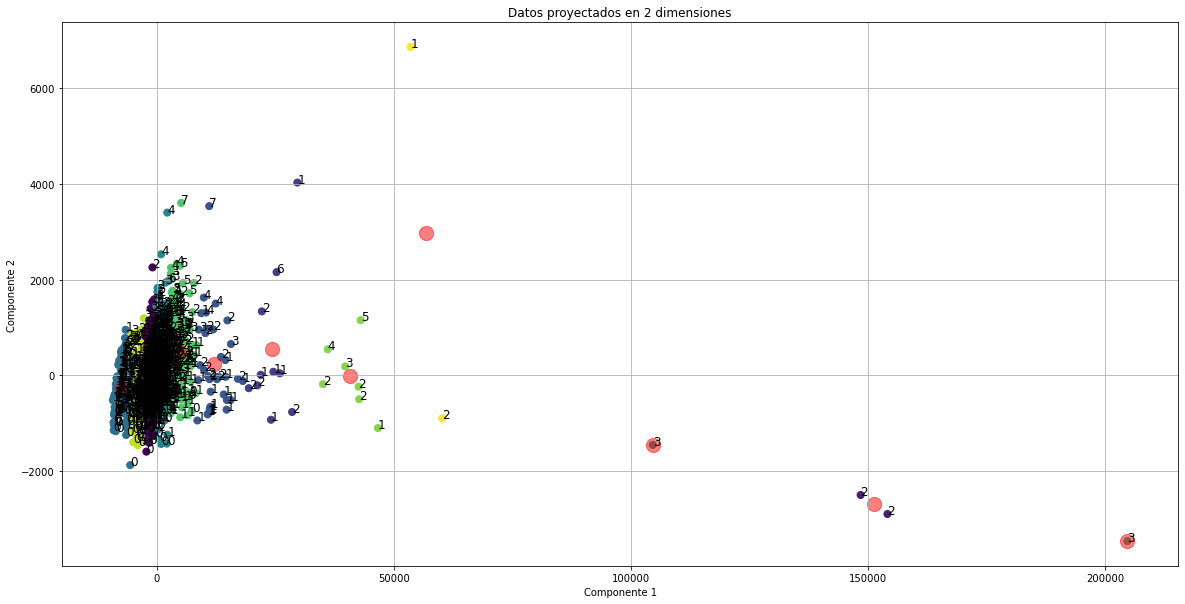

Probando modelo con K= 13
--------------------------


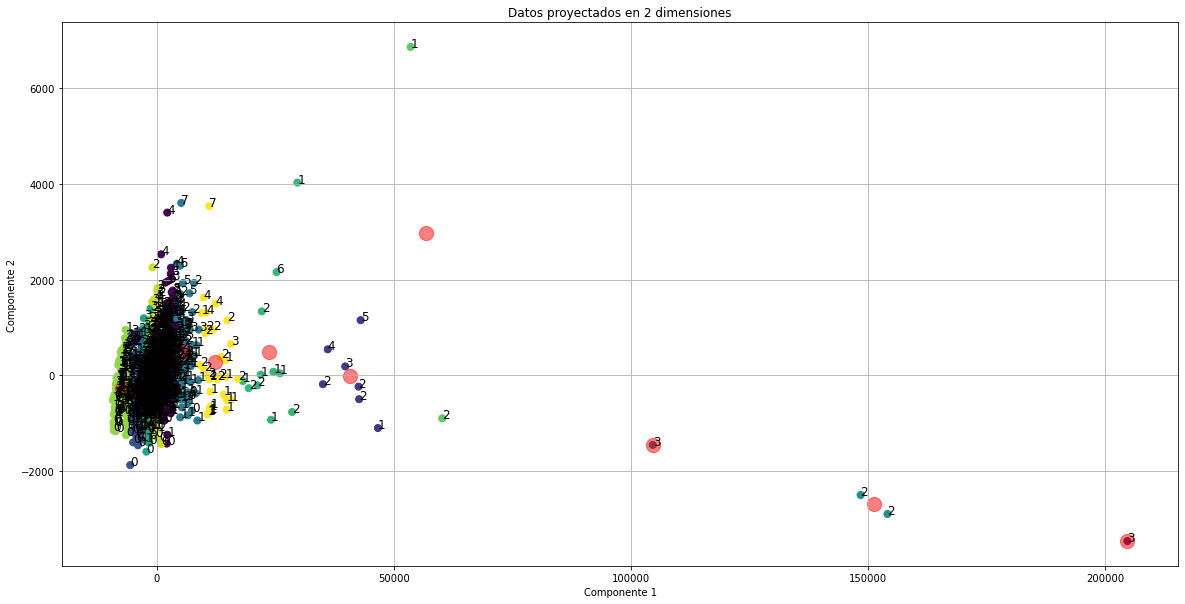

Probando modelo con K= 14
--------------------------


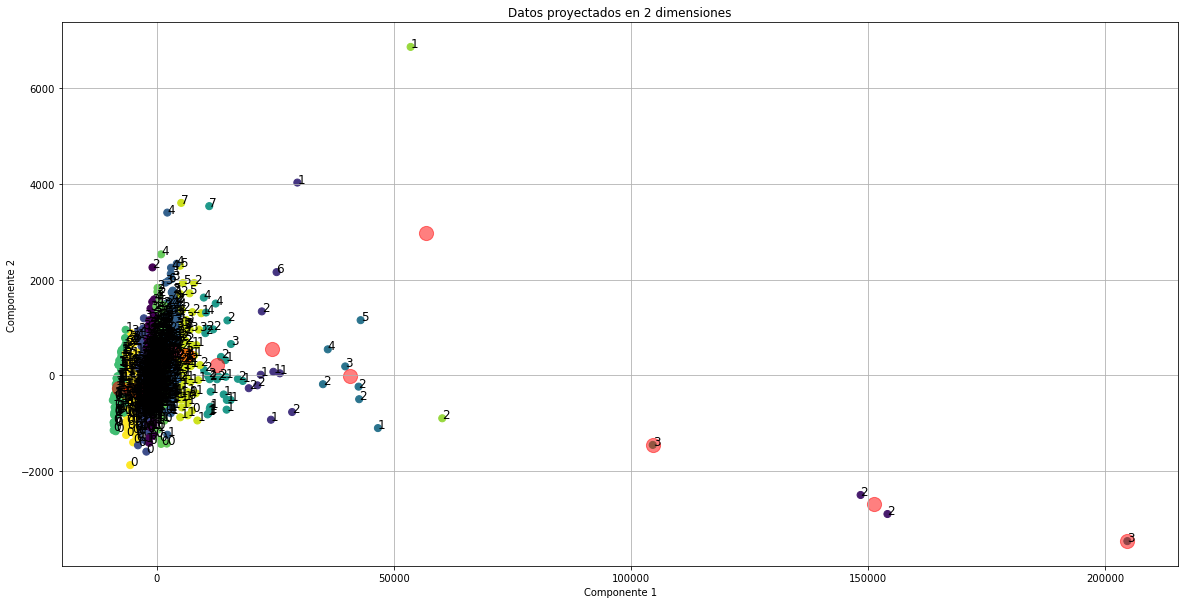

Probando modelo con K= 15
--------------------------


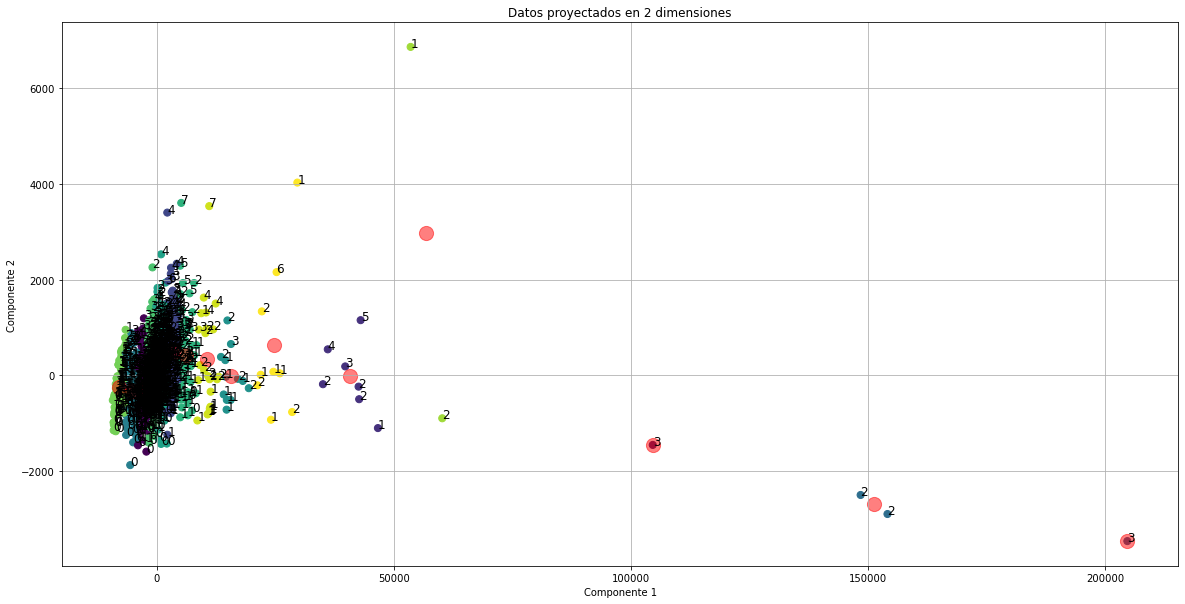

Probando modelo con K= 16
--------------------------


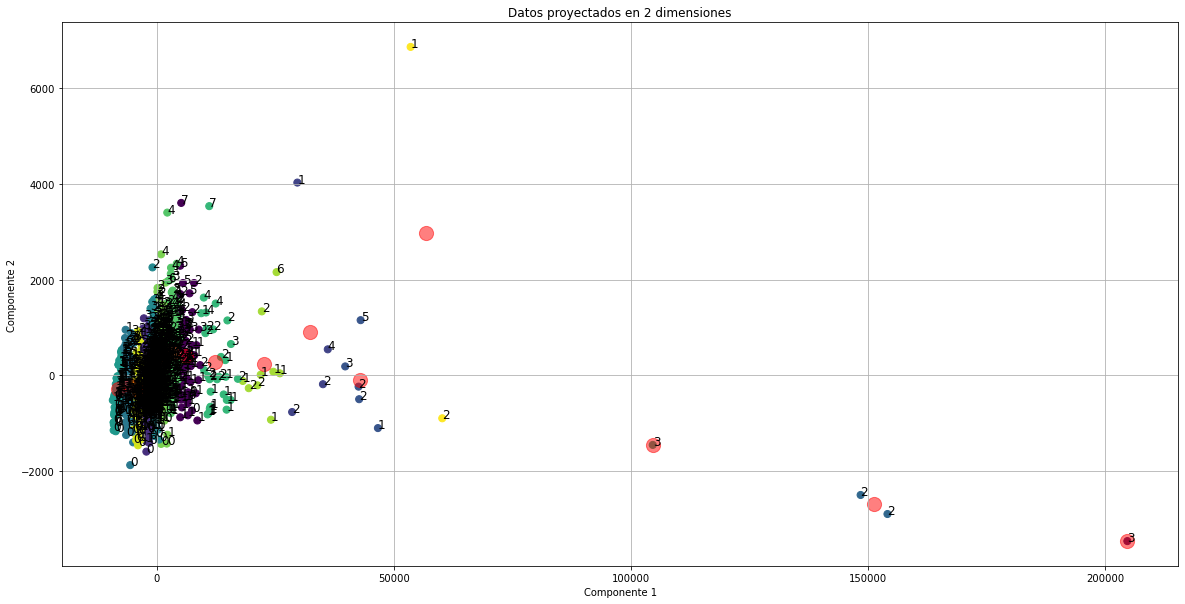

Probando modelo con K= 17
--------------------------


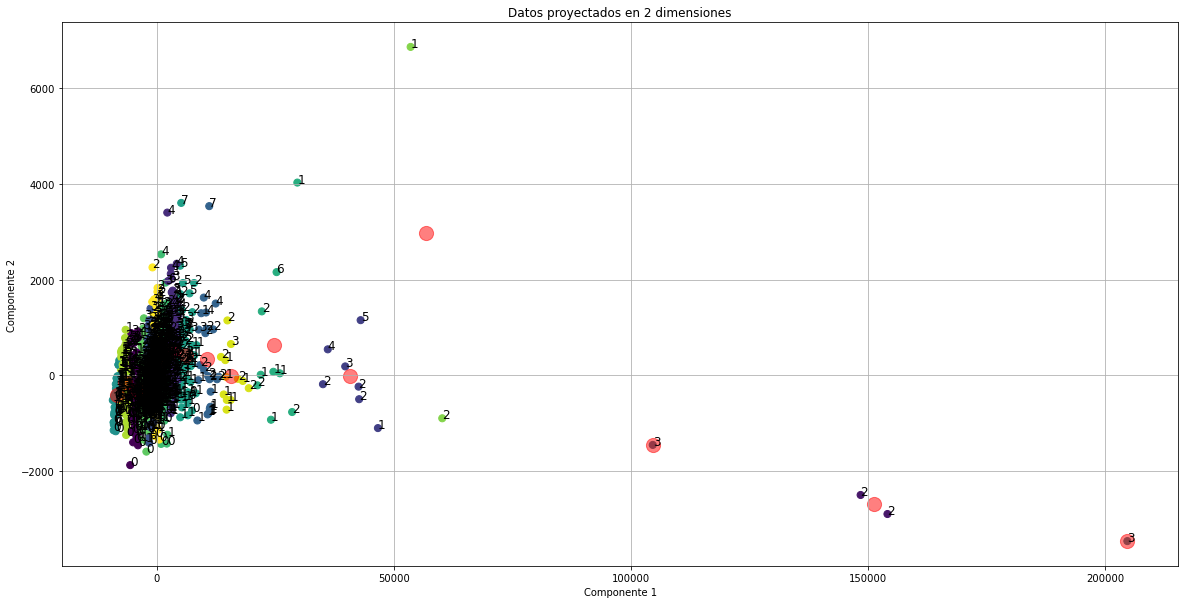

Probando modelo con K= 18
--------------------------


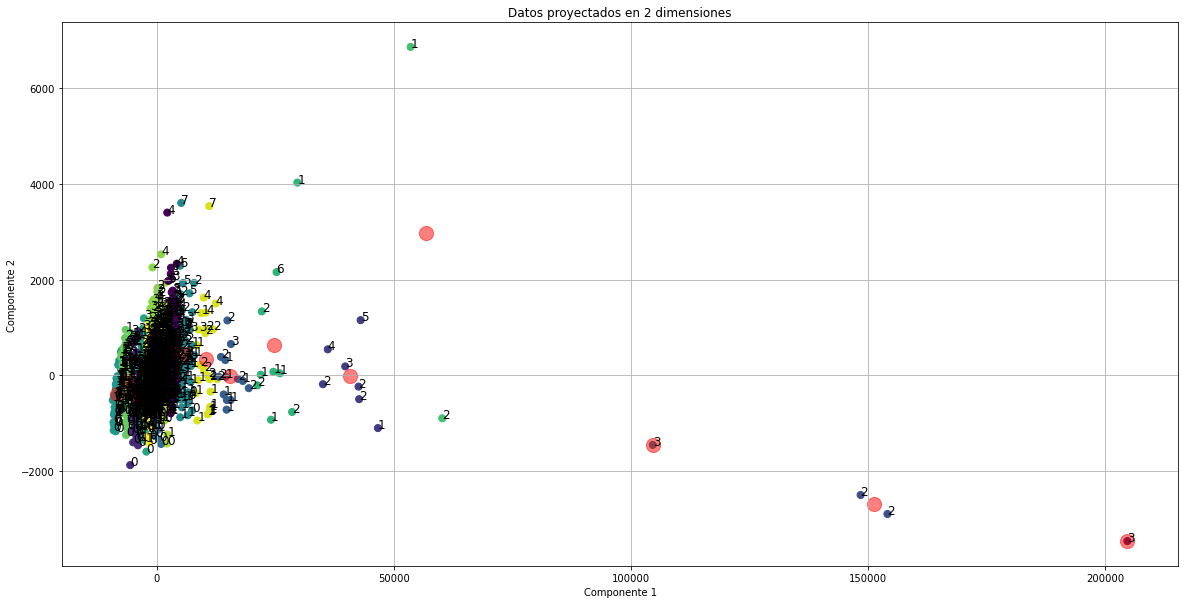

Probando modelo con K= 19
--------------------------


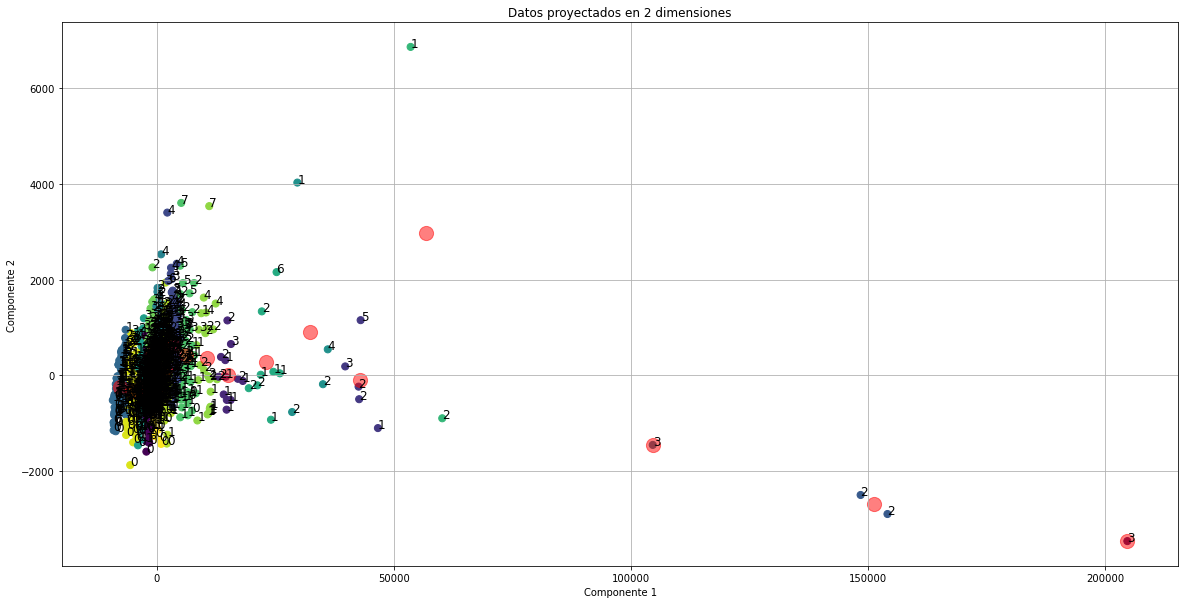

Probando modelo con K= 20
--------------------------


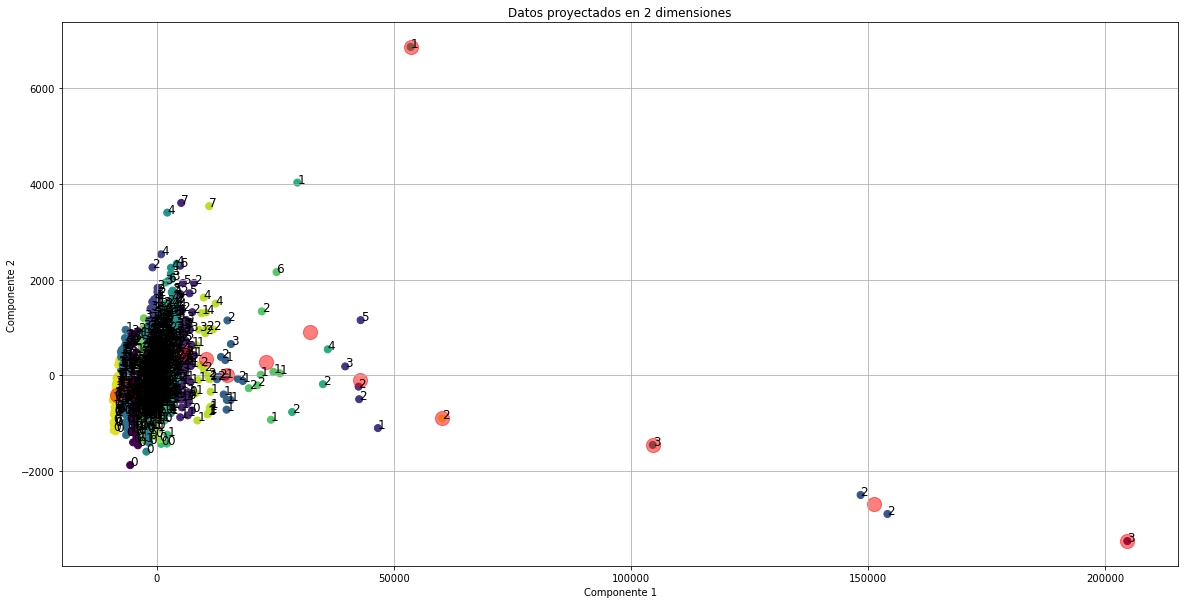

Probando modelo con K= 21
--------------------------


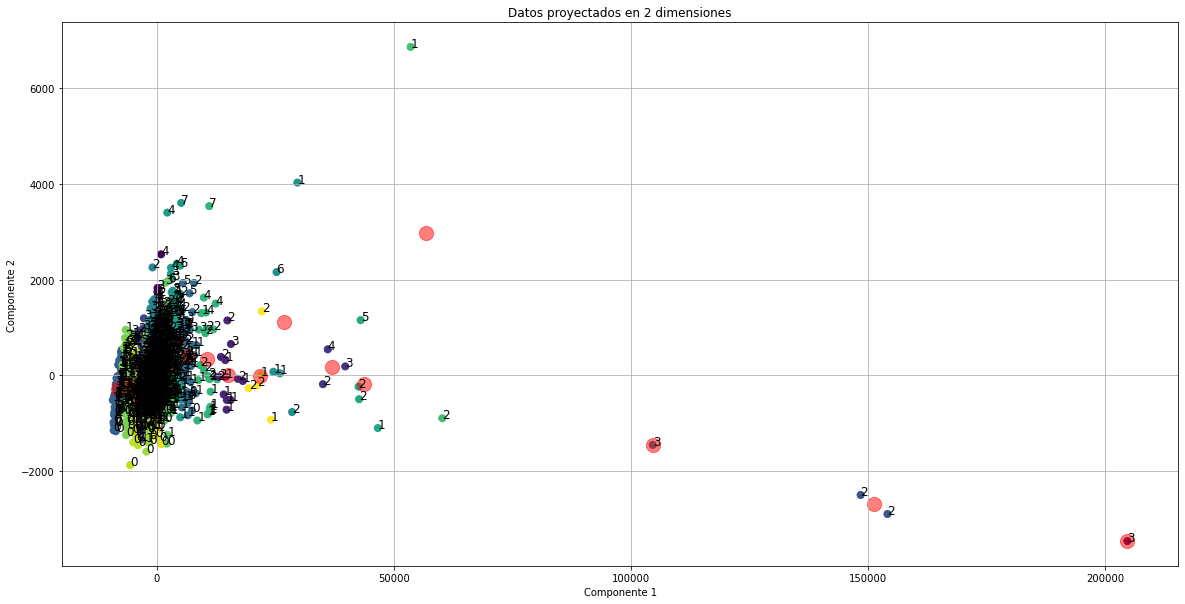

Probando modelo con K= 22
--------------------------


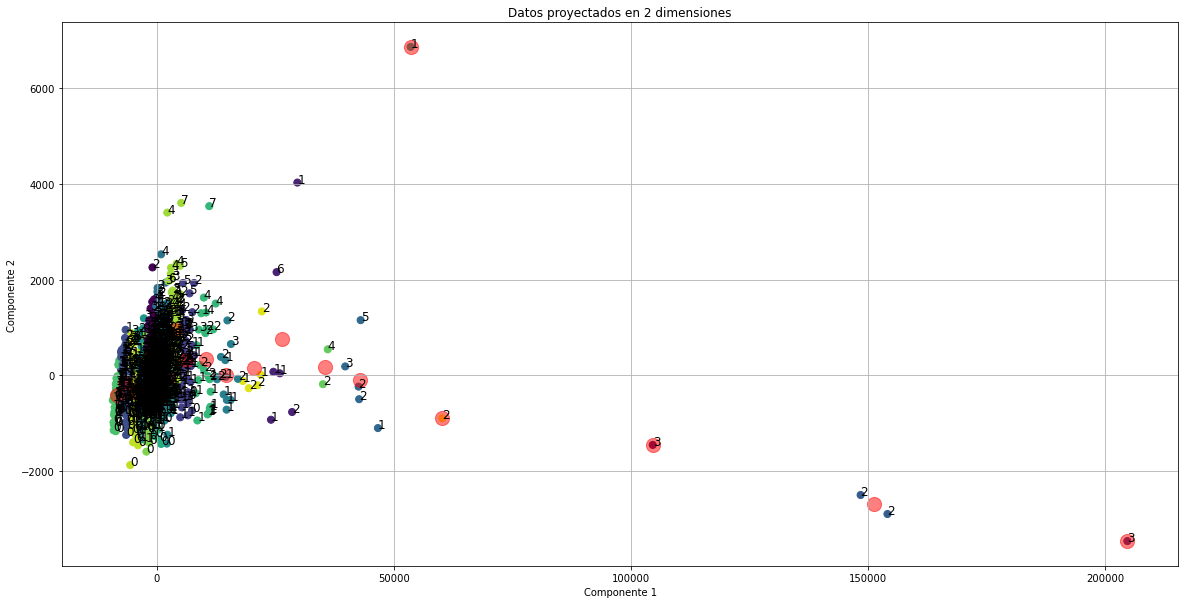

Probando modelo con K= 23
--------------------------


KeyboardInterrupt: 

In [150]:
# Distancias de cada modelo.
distancias = {}

# Bucle de creación de modelos con K distintos.
for K in range(1, 40):
    
    print("Probando modelo con K=", K)
    print("--------------------------")
    
    # Creación del modelo.
    modelo = KMeans(n_clusters=K, max_iter=50)
    
    # Entrenamiento del modelo.
    modelo.fit(principalComponents)
    
    # Predicción de los grupos del dataset.
    prediccion = modelo.predict(principalComponents)
    
    # Dibujamos el mapa de agrupaciones.
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.scatter(finalDf["Componente 1"], finalDf["Componente 2"], \
                c=prediccion, s=50, cmap='viridis')
    for i, txt in enumerate(finalDf["Rango"]):
        pos = (finalDf["Componente 1"][i] + 0.05, finalDf["Componente 2"][i])
        ax.annotate(txt, (finalDf["Componente 1"][i], finalDf["Componente 2"][i]), \
                    pos, 'data', size=12)

    # Calculamos los centroides y los añadimos al mapa.
    centroides = modelo.cluster_centers_
    plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
    plt.grid(True)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Datos proyectados en 2 dimensiones')
    plt.show()
    
    # Guardamos la suma del cuadrado de las distancias de las muestras al centroide más cercano.
    distancias[K] = modelo.inertia_

### 3) Con la mejor configuración del apartado anterior, utiliza dos criterios para elegir el lugar inicial del punto central de los grupos. Dibuja cómo se van modificando los grupos y cómo van cambiando sus centroides en cada iteración. Obtén una conclusión acerca de dónde deberían situarse los centroides. (1 punto)

### 4) Estudia qué técnicas de postprocesamiento se podrían aplicar en base al error cometido en cada clúster (1 punto)

## Conclusiones